## Week 7 Assignment (Artificial Neural Network)

# HEART FAILURE PREDICTION

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**TABLE OF CONTENTS**

1. IMPORTING LIBRARIES
2. LOADING DATA
3. DATA ANALYSIS
4. DATA PREPROCESSING
5. MODEL BUILDING:
6. MODEL EVALUATION

# 1. IMPORTING LIBRARIES

In [2]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

2023-10-31 10:58:12.911003: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
## warning
import warnings
warnings.filterwarnings('ignore')

**About the data (Description of attributes)**

 - **age:** Age of the patient
 - **anaemia:** Haemoglobin level of patient (Boolean)
 - **creatinine_phosphokinase:** Level of the CPK enzyme in the blood (mcg/L)
 - **diabetes:** If the patient has diabetes (Boolean)
 - **ejection_fraction:** Percentage of blood leaving the heart at each contraction
 - **high_blood_pressure:** If the patient has hypertension (Boolean)
 - **platelets:** Platelet count of blood (kiloplatelets/mL)
 - **serum_creatinine:** Level of serum creatinine in the blood (mg/dL)
 - **serum_sodium:** Level of serum sodium in the blood (mEq/L)
 - **sex:** Sex of the patient
 - **smoking:** If the patient smokes or not (Boolean)
 - **time:** Follow-up period (days)
 - **DEATH_EVENT:** If the patient deceased during the follow-up period (Boolean)
 
[Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)]

# 2. LOADING DATA

In [4]:
## load my dataset
df = pd.read_csv('heart_dataset.csv')

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# 3. DATA ANALYSIS

In [7]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

[Text(0, 0, '203'), Text(0, 0, '96')]

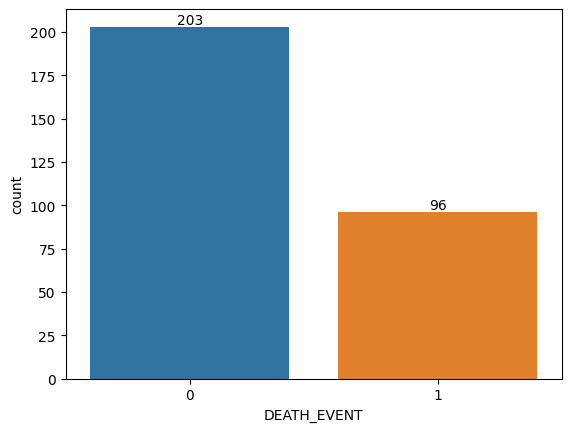

In [8]:
ax = sns.countplot(x=df["DEATH_EVENT"])
ax.bar_label(ax.containers[0])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
## drop the irrelevant column
df.drop_duplicates()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Axes: xlabel='age', ylabel='Count'>

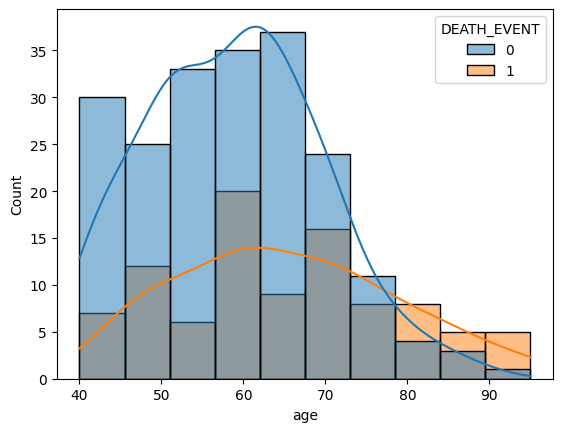

In [12]:
sns.histplot(data=df, x="age", hue='DEATH_EVENT', kde=True)

<Axes: xlabel='time', ylabel='Count'>

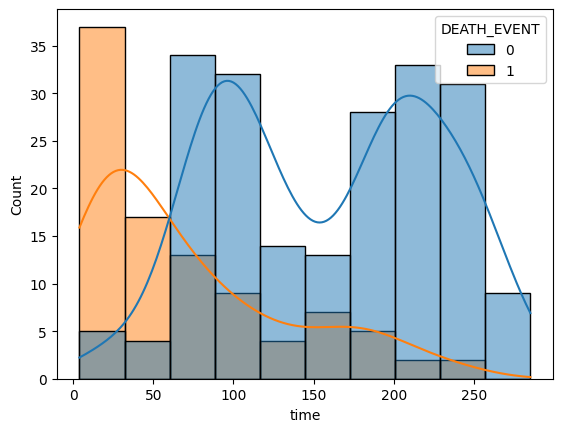

In [13]:
sns.histplot(data=df, x="time", hue='DEATH_EVENT', kde=True)

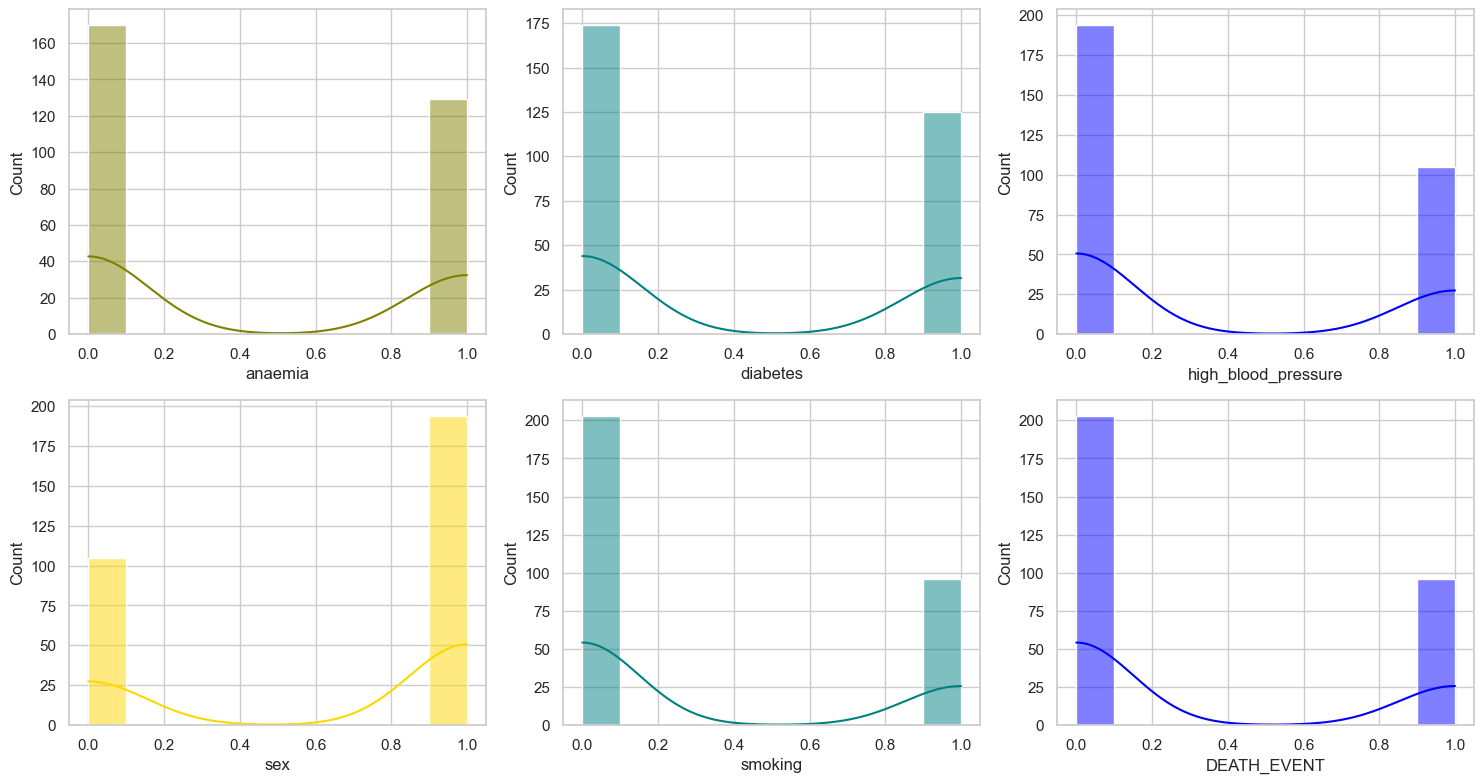

In [14]:
sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,3, figsize = (15,8))
sns.histplot(data=df, x="anaemia", kde=True, color="olive", ax=axs[0, 0])
sns.histplot(data=df, x="diabetes", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="high_blood_pressure", kde=True, color="blue", ax=axs[0, 2])
sns.histplot(data=df, x="sex", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="smoking", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="DEATH_EVENT", kde=True, color="blue", ax=axs[1, 2])
fig.tight_layout()

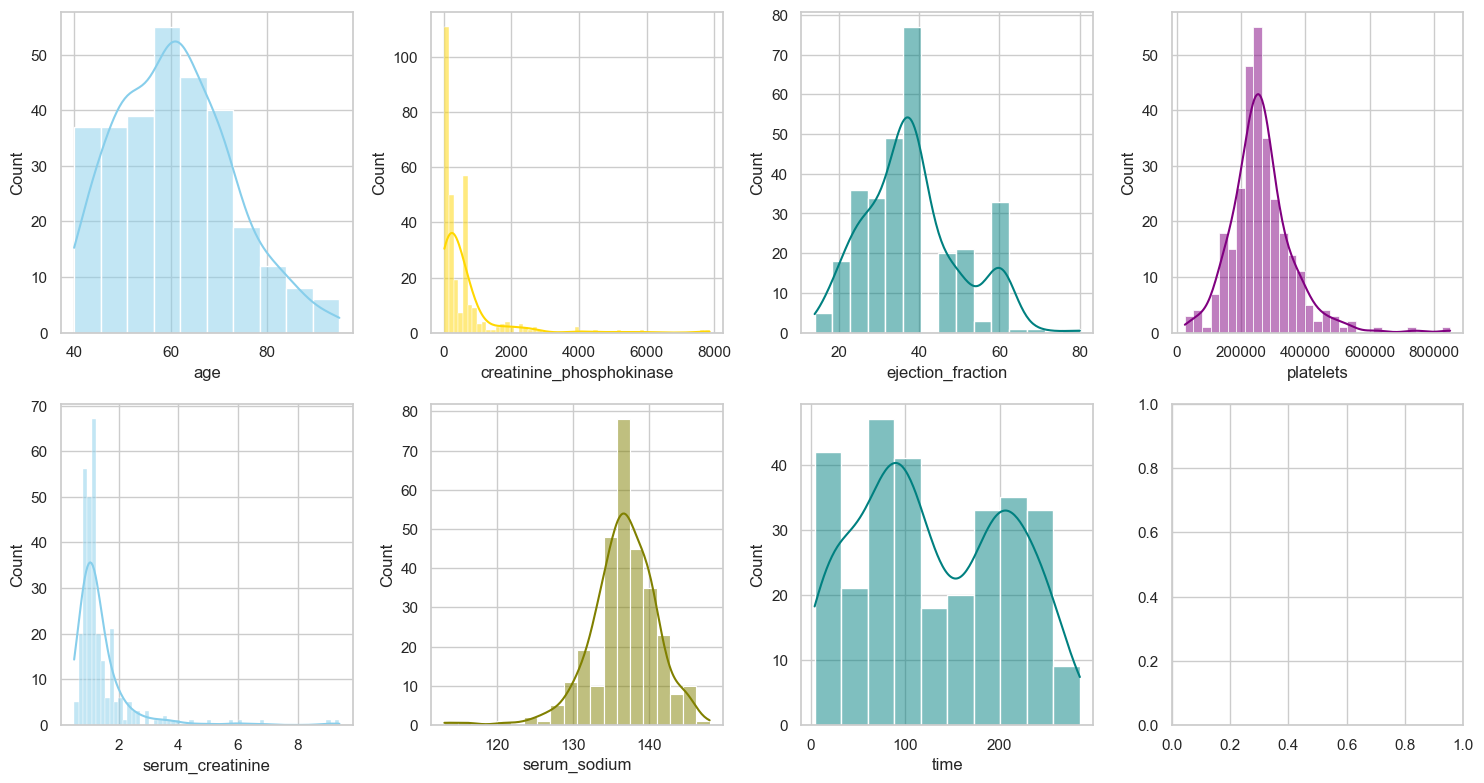

In [15]:
sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,4, figsize = (15,8))
sns.histplot(data=df, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="creatinine_phosphokinase", kde=True, color="gold", ax=axs[0, 1])
sns.histplot(data=df, x="ejection_fraction", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df, x="platelets", kde=True, color="purple", ax=axs[0,3])
sns.histplot(data=df, x="serum_creatinine", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df, x="serum_sodium", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=df, x="time", kde=True, color="teal", ax=axs[1,2])
fig.tight_layout()

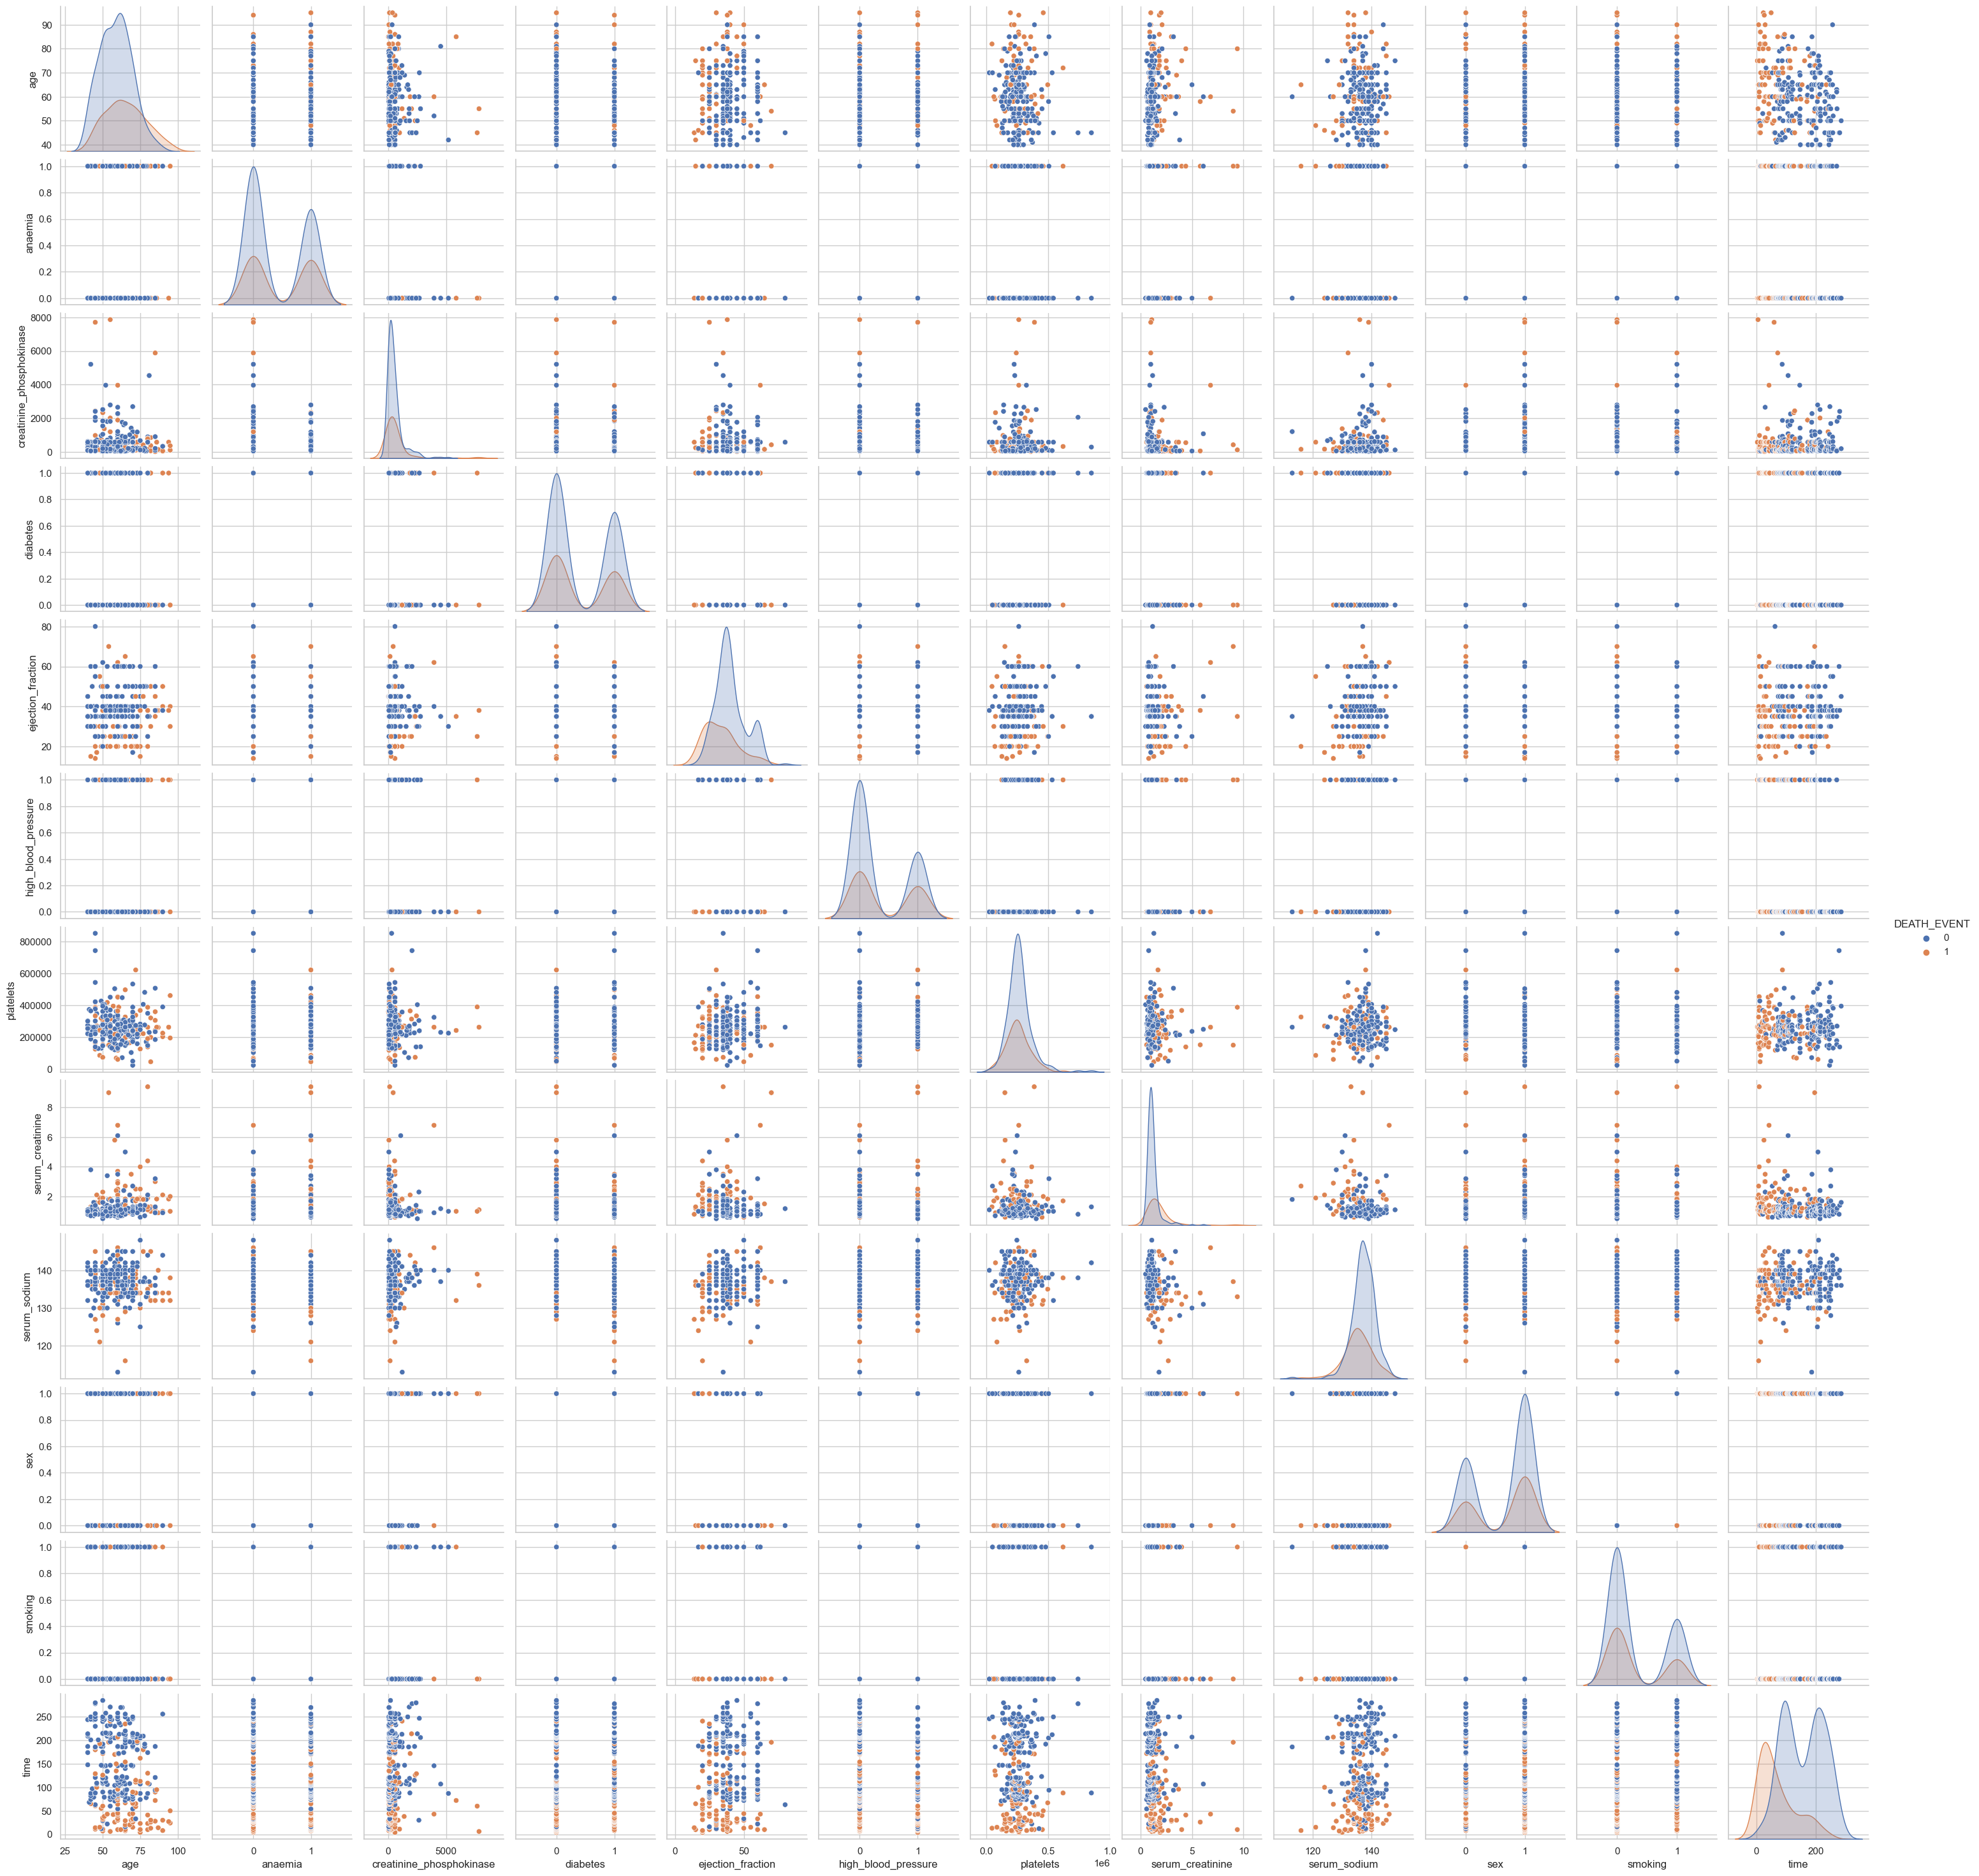

In [16]:
sns.pairplot(df, hue='DEATH_EVENT')

<Axes: >

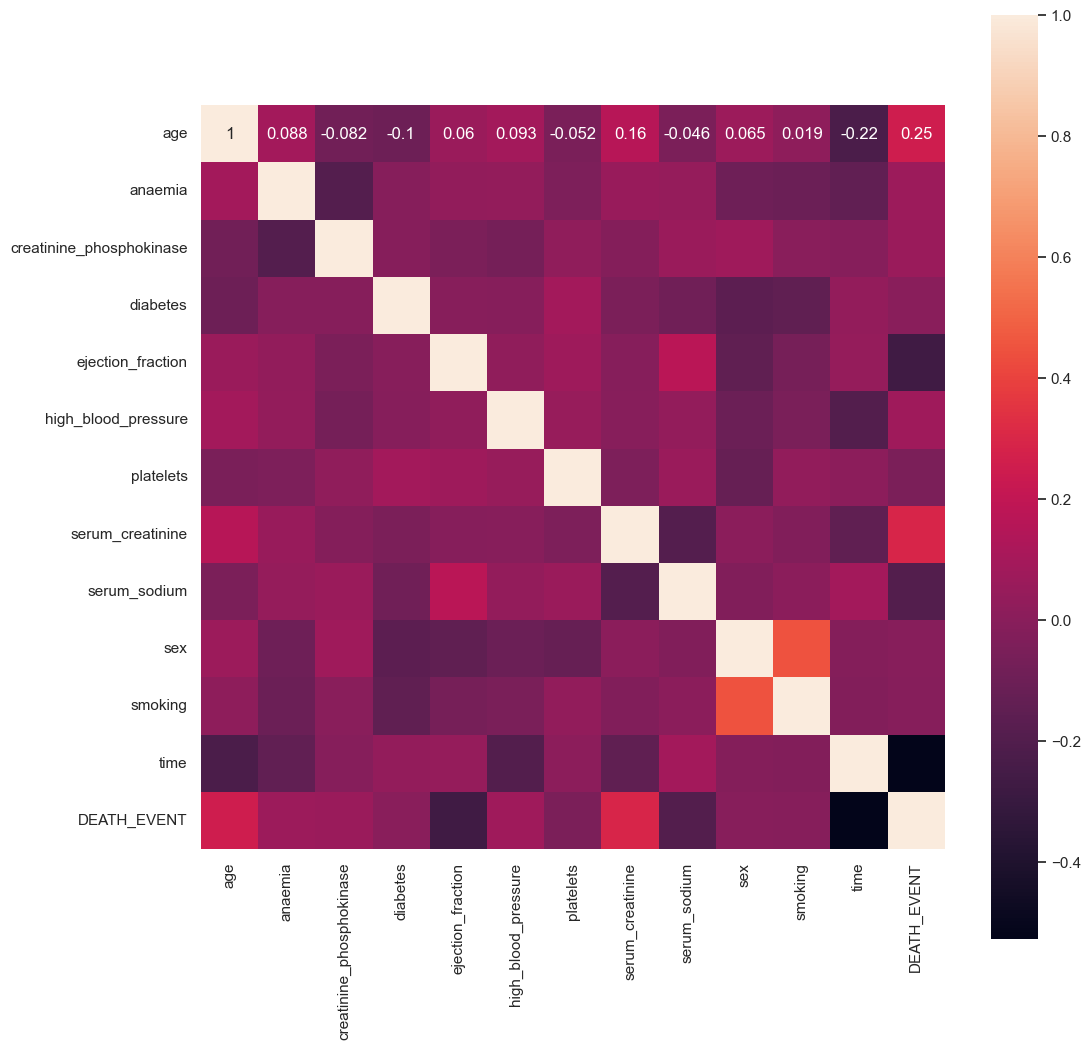

In [17]:
corrmat = df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, annot=True, square=True)

# 4. DATA PREPROCESSING

In [18]:
## splitting the data into dependent and independent variable
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [19]:
## split the data into train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

In [20]:
# Create a scaler
scaler = StandardScaler()

# Scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [21]:
## train the model
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [22]:
## make prediction
LR_pred = model_LR.predict(X_test)

In [23]:
## PUTTING THE ACTUAL AND PREDICTED IN A DATAFRAME
LR_eval = pd.DataFrame({'Actual': y_test, 'Predicted': LR_pred})
LR_eval.sample(20)

,Actual,Predicted
0,0,0
54,0,0
35,0,0
52,0,0
20,1,1
32,0,1
3,1,1
23,0,0
27,1,1
43,0,0


In [24]:
## model evaluation
accuracy_LR = accuracy_score(y_test, LR_pred )
## confusion matrix
conf_mat = confusion_matrix(y_test, LR_pred)


print('Accuracy (Logistic Regression):', accuracy_LR*100, '%')
print(conf_mat)

Accuracy (Logistic Regression): 85.0 %
[[37  4]
 [ 5 14]]


In [25]:
## classification report
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



In [26]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix', fontsize = 10)
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

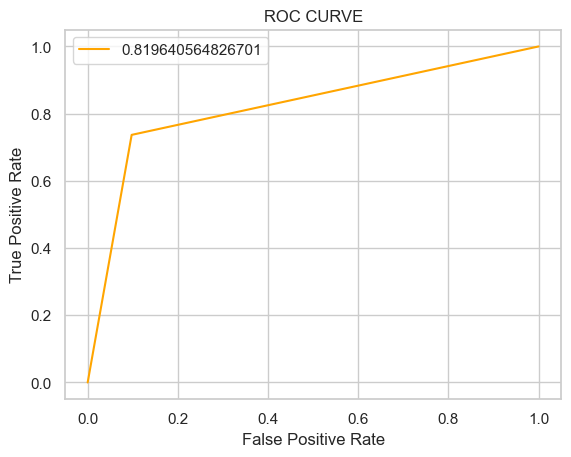

In [ ]:
auc_LR = roc_auc_score(y_test, LR_pred)
fpr, tpr, _ = roc_curve(y_test, LR_pred)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

## Naive Bayes

In [ ]:

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
## predict 
NB_pred = model_NB.predict(X_test)

In [ ]:
print('Accuracy (GaussianNB):', (accuracy_score(y_test, NB_pred))*100, '%')

Accuracy (GaussianNB): 75.0 %


In [ ]:
## putting it in a dataframe

NB_eval = pd.DataFrame({'actual': y_test, 'Predicted': NB_pred})
NB_eval.sample(10)

,actual,Predicted
22,0,0
24,0,0
19,1,0
14,0,0
54,0,0
28,0,0
46,1,1
53,0,0
59,1,1
49,0,0


## Decision Tree

In [ ]:
## decision tree (from sklearn.tree import DecisionTreeClassifier)
## create a decision tree with criterion Gini with no max depth
decision_tree_gini = DecisionTreeClassifier()

## create a decision tree with criterion Entropy with no max depth
decision_tree_entropy = DecisionTreeClassifier(criterion = 'entropy')

## criterion Gini with max depth of 4
decision_tree_depth = DecisionTreeClassifier(max_depth = 4)

In [ ]:
## fit our model
decision_tree_gini.fit(X_train, y_train)
decision_tree_entropy.fit(X_train, y_train)
decision_tree_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
## make prediction
y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_entropy = decision_tree_entropy.predict(X_test)
y_pred_depth = decision_tree_depth.predict(X_test)

In [ ]:
print('Accuracy (Gini):', (accuracy_score(y_test, y_pred_gini))*100, '%')
print('Accuracy (Entropy):', (accuracy_score(y_test, y_pred_entropy))*100, '%')
print('Accuracy (Max depth):', (accuracy_score(y_test, y_pred_depth))*100, '%')

Accuracy (Gini): 76.66666666666667 %
Accuracy (Entropy): 80.0 %
Accuracy (Max depth): 83.33333333333334 %


In [ ]:
gini_eval = pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_gini})
gini_eval.sample(10)

,Actual Survival,Predicted Survival
41,1,1
21,1,1
9,0,0
20,1,1
55,0,0
59,1,1
27,1,1
1,0,0
30,0,1
28,0,0


In [ ]:
entropy_eval  =pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_entropy})
entropy_eval.sample(10)

,Actual Survival,Predicted Survival
58,1,1
5,0,0
3,1,1
53,0,0
49,0,0
19,1,1
24,0,0
33,0,0
43,0,0
26,0,0


In [ ]:
DT_depth_eval  =pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_depth})
DT_depth_eval.sample(10)

,Actual Survival,Predicted Survival
44,0,0
5,0,0
24,0,0
13,1,1
20,1,1
2,0,0
6,0,0
4,0,0
30,0,1
22,0,0


## Support Vector Machine

In [ ]:
svc_lin = svm.SVC(kernel = 'linear') 
svc_sig = svm.SVC(kernel = 'sigmoid') 
svc_rbf = svm.SVC(kernel = 'rbf') 

In [ ]:
## train our model
svc_lin.fit(X_train, y_train)
svc_sig.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

SVC()

In [ ]:
## make our predictions
y_pred_lin = svc_lin.predict(X_test)
y_pred_sig = svc_sig.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)

In [ ]:
## model evalution
print('Accuracy (SVC linear):', (accuracy_score(y_test, y_pred_lin))*100, '%')
print('Accuracy (SVC sigmoid):', (accuracy_score(y_test, y_pred_sig))*100, '%')
print('Accuracy (SVC rbf):', (accuracy_score(y_test, y_pred_rbf))*100, '%')

Accuracy (SVC linear): 83.33333333333334 %
Accuracy (SVC sigmoid): 80.0 %
Accuracy (SVC rbf): 75.0 %


In [ ]:
lin_eval  =pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_lin})
lin_eval.sample(10)

,Actual Survival,Predicted Survival
36,0,0
38,0,0
5,0,0
30,0,1
43,0,0
26,0,0
56,0,0
16,0,0
45,1,0
35,0,0


In [ ]:
sig_eval  =pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_sig})
sig_eval.sample(10)

,Actual Survival,Predicted Survival
37,0,0
16,0,0
44,0,1
22,0,0
43,0,0
11,0,0
23,0,0
35,0,0
49,0,0
31,0,0


In [ ]:
rbf_eval  =pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': y_pred_rbf})
rbf_eval.sample(10)

,Actual Survival,Predicted Survival
50,0,0
19,1,0
59,1,0
1,0,0
0,0,1
28,0,0
47,1,1
36,0,0
17,0,0
26,0,0


### ARTIFICIAL NEURAL NETWORK

In [ ]:
# initialise the neural network
model = Sequential()

# input layers
model.add(Dense(units=16, kernel_initializer='uniform', activation= 'relu', input_shape=(None, 12)))

# hidden layers
model.add(Dense(units=8, kernel_initializer='uniform', activation= 'relu'))

#regularisation
model.add(Dropout(0.25))

#output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation= 'sigmoid'))

In [ ]:
# compile the network
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 16)          208       
                                                                 
 dense_1 (Dense)             (None, None, 8)           136       
                                                                 
 dropout (Dropout)           (None, None, 8)           0         
                                                                 
 dense_2 (Dense)             (None, None, 1)           9         
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model.fit(X_train, y_train, batch_size = 25, epochs = 20, validation_split = 0.25)

Epoch 1/20
8/8 [==============================] - 1s 34ms/step - loss: 0.6925 - accuracy: 0.6480 - val_loss: 0.6910 - val_accuracy: 0.7333
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 0.6911 - accuracy: 0.6592 - val_loss: 0.6889 - val_accuracy: 0.7333
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 0.6898 - accuracy: 0.6592 - val_loss: 0.6868 - val_accuracy: 0.7333
Epoch 4/20
8/8 [==============================] - 0s 8ms/step - loss: 0.6879 - accuracy: 0.6592 - val_loss: 0.6837 - val_accuracy: 0.7333
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 0.6855 - accuracy: 0.6592 - val_loss: 0.6794 - val_accuracy: 0.7333
Epoch 6/20
8/8 [==============================] - 0s 8ms/step - loss: 0.6814 - accuracy: 0.6592 - val_loss: 0.6740 - val_accuracy: 0.7333
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 0.6762 - accuracy: 0.6592 - val_loss: 0.6662 - val_accuracy: 0.7333
Epoch 8/20
8/8 [=================

In [ ]:
# save the model
model.save('heart_disease.h5')

In [ ]:
# load the saved model
ann_model = tf.keras.models.load_model('heart_ann_model')

In [ ]:
# make prediction on the test data
y_pred_ann = ann_model.predict(X_test)
y_pred_ann

2/2 [==============================] - 0s 2ms/step


array([[0.20964196],
       [0.17399167],
       [0.14190292],
       [0.50430095],
       [0.37560162],
       [0.18926516],
       [0.4283943 ],
       [0.03444184],
       [0.29616597],
       [0.2651171 ],
       [0.21314996],
       [0.5086866 ],
       [0.49605298],
       [0.5482315 ],
       [0.40248117],
       [0.30649662],
       [0.39572883],
       [0.27263817],
       [0.34273463],
       [0.22629313],
       [0.44862643],
       [0.49886638],
       [0.24232325],
       [0.1881104 ],
       [0.4452661 ],
       [0.20756511],
       [0.17867705],
       [0.5247529 ],
       [0.3961754 ],
       [0.35708773],
       [0.44926015],
       [0.15216513],
       [0.55192053],
       [0.24985196],
       [0.53089136],
       [0.20740673],
       [0.1604089 ],
       [0.25353268],
       [0.12249096],
       [0.5488665 ],
       [0.5293652 ],
       [0.50248224],
       [0.28472504],
       [0.25900292],
       [0.541186  ],
       [0.1780713 ],
       [0.54231197],
       [0.561

In [ ]:
# set a threshold
y_pred_ann = np.where(y_pred_ann > 0.5, 1,0)


In [ ]:
# flatten
y_pred_ann = y_pred_ann.flatten()

In [ ]:
# put in a dataframe
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})
data.sample(10)

,Actual,Predicted
0,0,0
19,1,0
8,0,0
4,0,0
39,1,1
24,0,0
45,1,0
52,0,0
37,0,0
7,0,0


In [ ]:
print('Accuracy (ANN):', (accuracy_score(y_test, y_pred_ann))*100, '%')

Accuracy (ANN): 76.66666666666667 %


In [ ]:
## classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        41
           1       0.69      0.47      0.56        19

    accuracy                           0.77        60
   macro avg       0.74      0.69      0.70        60
weighted avg       0.76      0.77      0.75        60



array([[37,  4],
       [10,  9]])

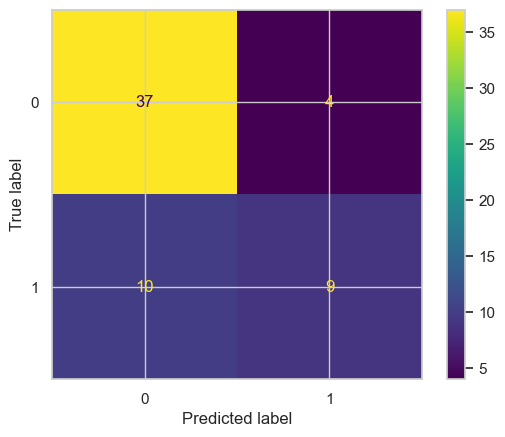

In [ ]:
## confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
cm

In [ ]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(cm, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('ANN Confusion Matrix', fontsize = 10)
plt.show()

TypeError: cannot unpack non-iterable ConfusionMatrixDisplay object

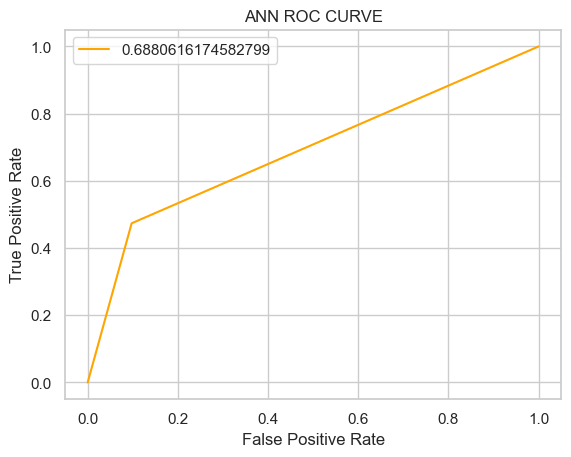

In [ ]:
auc_ann = roc_auc_score(y_test, y_pred_ann)
fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color = 'orange', label = auc_ann)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC CURVE')
plt.legend()
plt.show()